<a href="https://colab.research.google.com/github/Rohan20202/Cardiovascular-Risk-Prediction-Project/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction Project**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.**

# **Data Description :**

**Variables :**

**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral :**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

**Medical( history)**


• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**•Predict variable (desired target)**

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
Dv 

## **Connecting the drive**

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [ ]:
#loading the libraries
import pandas as pd                 #Extensively used to load and wrangle with the dataset.
import numpy as np                  #For some math operations in predictions
import matplotlib.pyplot as plt     #Used for visualization.
import seaborn as sns               #Used for visualization.
import missingno as mno             #install  pip install missingno
import warnings                     #For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor        #For Multicolinearity

**Loading the dataset**

In [ ]:
#loading the given dataset
data = pd.read_csv('/content/drive/MyDrive/Caridovascular Risk prediction/data_cardiovascular_risk.csv')

In [ ]:
#first 5 rows of data
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#shape and of the dataset
data.shape

(3390, 17)

In [ ]:
#all the columns in the dataset
data.columns


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#the number of unique values that each column contains
data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [ ]:
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#showing the datatype of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## **Data Cleaning**

**Checking for null values**

In [ ]:
pd.DataFrame(data.isna().sum(),columns=['records missings']).T

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
records missings,0,0,87,0,0,22,44,0,0,0,38,0,0,14,1,304,0


In [ ]:
data.dropna(axis = 0, inplace = True) 
print(data.shape)

(2927, 17)


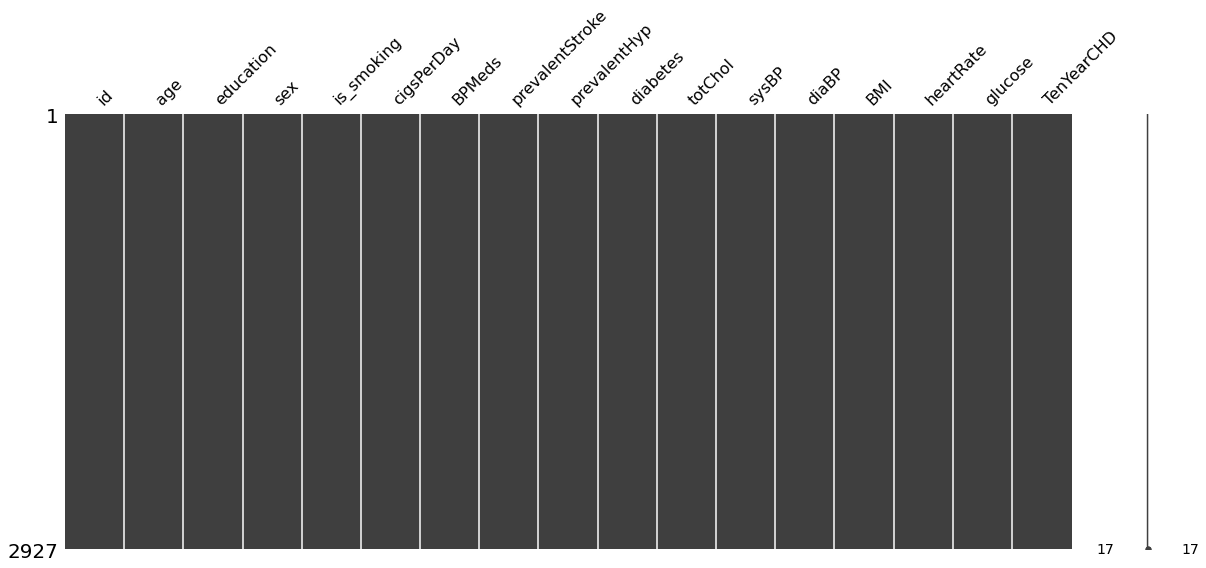

In [ ]:
#checking for nan values
mno.matrix(data,figsize=(20,8))

# **Data Visualization**

**Seprate dependent and independent variables**

In [ ]:
dependent_variable = 'TenYearCHD'

In [ ]:
independent_variables = list(set(data.columns.tolist()) - {dependent_variable})
independent_variables

['diabetes',
 'age',
 'glucose',
 'heartRate',
 'BPMeds',
 'sysBP',
 'BMI',
 'cigsPerDay',
 'id',
 'sex',
 'diaBP',
 'education',
 'prevalentHyp',
 'is_smoking',
 'totChol',
 'prevalentStroke']

In [ ]:
# Divide the columns based on the type for clear management
col_Demographic = [ 'age', 'education', 'sex']

col_Behavioral = ['is_smoking', 'cigsPerDay']

col_medical_history = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

col_medical_current = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

col_target = ['TenYearCHD']

In [ ]:
independent_vars = data[col_Demographic + col_Behavioral + col_medical_history + col_medical_current]
dependent_vars = data[col_target]

In [ ]:
independent_vars.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,49.507345,1.965494,9.112743,0.030065,0.006150,0.314315,0.026990,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404
std,8.597191,1.017199,11.882784,0.170795,0.078192,0.464322,0.162082,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [ ]:
dependent_vars.describe()

,TenYearCHD
count,2927.000000
mean,0.151691
std,0.358783
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Hitogram for all the features to understand the distribution**

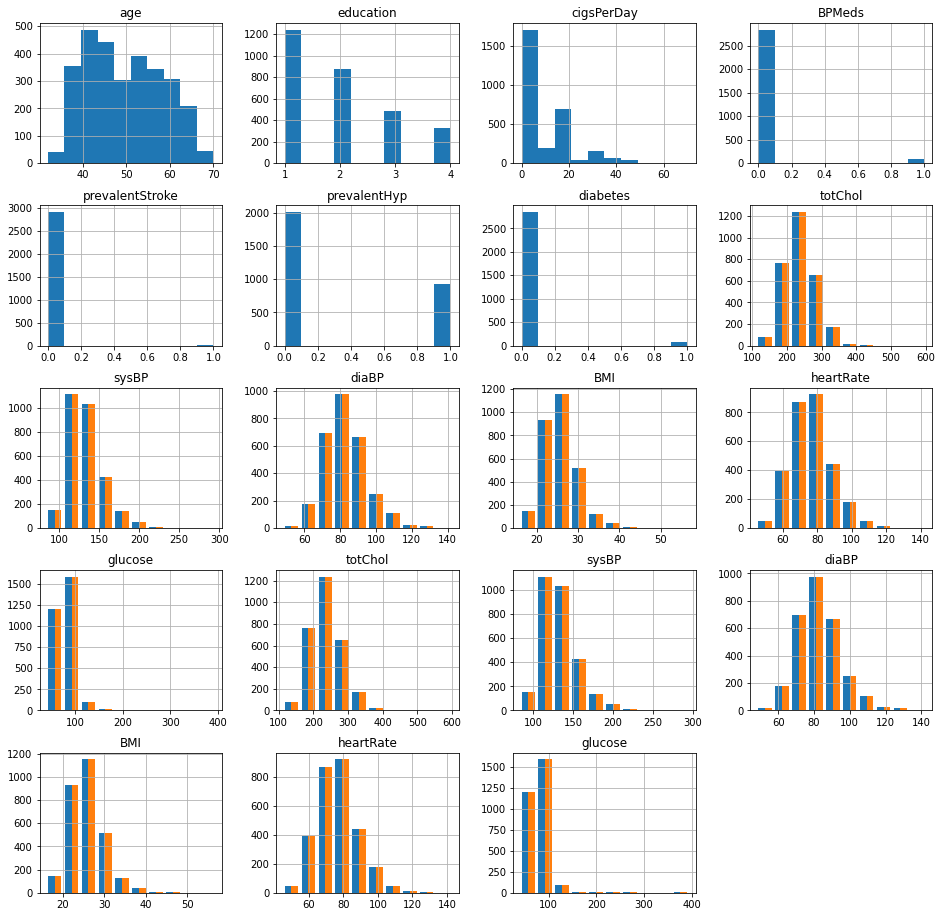

In [ ]:
independent_vars.hist(figsize= (16,16))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa620212b10>]],
      dtype=object)

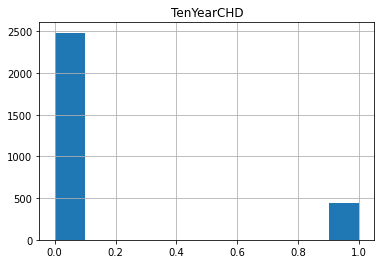

In [ ]:
dependent_vars.hist()

**Checking for Outliers**

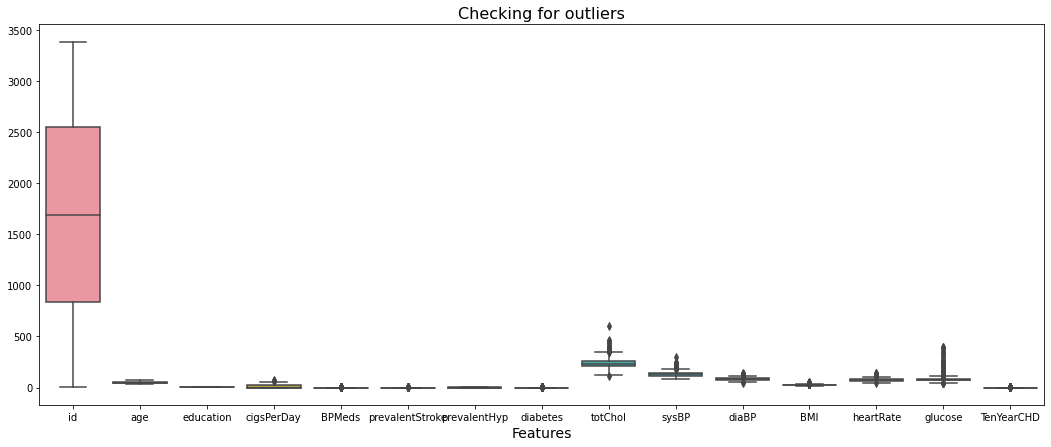

In [ ]:
plt.figure(figsize=(18,7))
sns.boxplot(data=data)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features', size=14)
plt.show()

## **Visualization on Dependent and Independent Variables**

**Predict variable (desired target)**

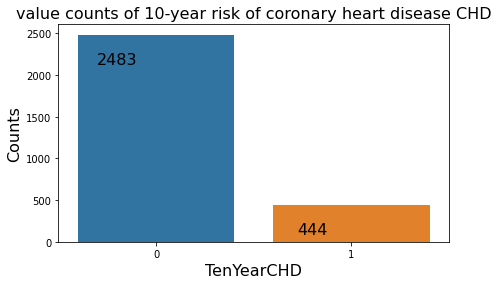

In [ ]:
# value counts of 10-year risk of coronary heart disease CHD
plt.figure(figsize=(7,4))
ch = sns.countplot(data['TenYearCHD'])
plt.xlabel('TenYearCHD', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of 10-year risk of coronary heart disease CHD', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

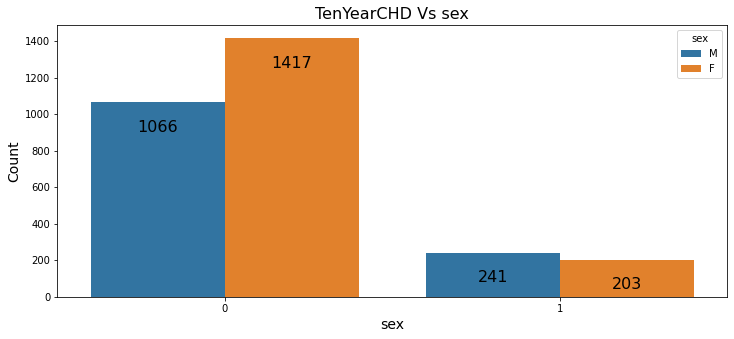

In [ ]:
#plotting of Promo days vs open and close of stores
plt.figure(figsize=(12,5))
ax = sns.countplot(x='TenYearCHD', hue='sex', data=data)
plt.title('TenYearCHD Vs sex', size=16)
plt.xlabel('sex', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

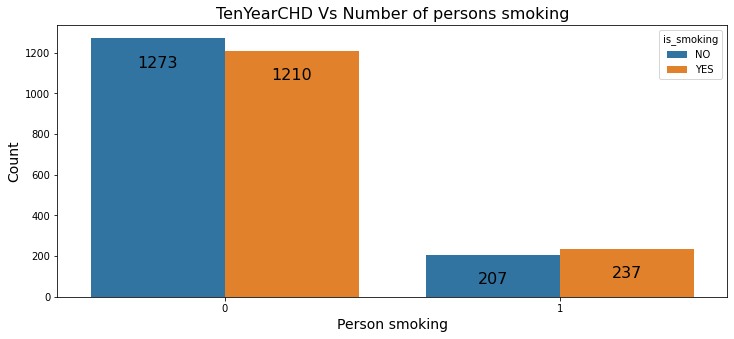

In [ ]:
#plotting of Promo days vs open and close of stores
plt.figure(figsize=(12,5))
ax = sns.countplot(x='TenYearCHD', hue='is_smoking', data=data)
plt.title('TenYearCHD Vs Number of persons smoking', size=16)
plt.xlabel('Person smoking', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

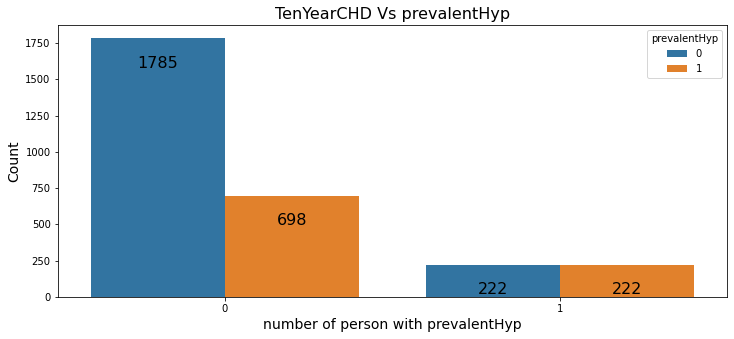

In [ ]:
#plotting of Promo days vs open and close of stores
plt.figure(figsize=(12,5))
ax = sns.countplot(x='TenYearCHD', hue='prevalentHyp', data=data)
plt.title('TenYearCHD Vs prevalentHyp', size=16)
plt.xlabel('number of person with prevalentHyp', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**value counts of male and female**

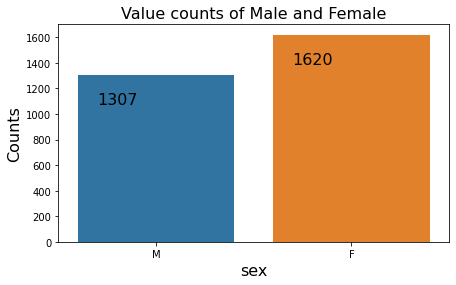

In [ ]:
# value counts of male and female
plt.figure(figsize=(7,4))
ch = sns.countplot(data['sex'])
plt.xlabel('sex', size=16)
plt.ylabel('Counts', size=16)
plt.title('Value counts of Male and Female', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**value counts of person smoking**

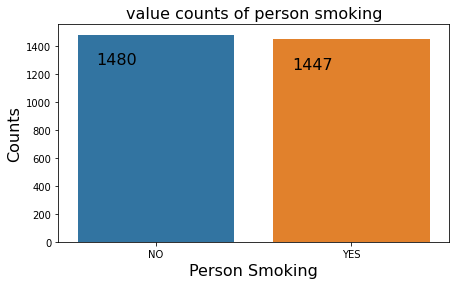

In [ ]:
# value counts of person smoking
plt.figure(figsize=(7,4))
ch = sns.countplot(data['is_smoking'])
plt.xlabel('Person Smoking', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of person smoking', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**value counts of patient was on blood pressure medication**

In [ ]:
# value counts of patient was on blood pressure medication
BPMeds = data['BPMeds'].dropna(0).value_counts()
BPMeds

0.0    2839
1.0      88
Name: BPMeds, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa61df49350>,
 [Text(-0.6373922057404507, -0.8965105554656471, '0.0'),
  Text(0.6953370375618967, 0.9780114540201692, '1.0')],
 [Text(-0.34766847585842764, -0.48900575752671654, '97.0%'),
  Text(0.4056132719111064, 0.5705066815117654, '3.0%')])

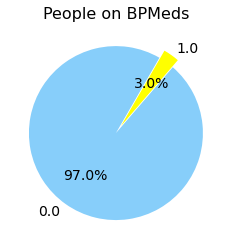

In [ ]:
plt.rcParams['figure.figsize'] = 4,4
labels = data['BPMeds'].value_counts().index.tolist()
sizes = data['BPMeds'].value_counts().tolist()
plt.title('People on BPMeds', size=16)
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**value counts of patient previously had a stroke**

In [ ]:
#value counts of patient previously had a stroke
prevalentStroke = data['prevalentStroke'].value_counts()
prevalentStroke

0    2909
1      18
Name: prevalentStroke, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa61e0281d0>,
 [Text(-0.5683006948333067, -0.9418249944931282, '0'),
  Text(0.6199644214188407, 1.0274454322127293, '1')],
 [Text(-0.3099821971818036, -0.5137227242689789, '99.4%'),
  Text(0.36164591249432365, 0.5993431687907588, '0.6%')])

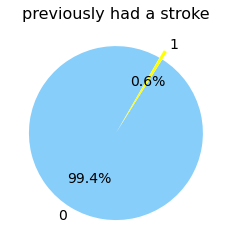

In [ ]:
plt.rcParams['figure.figsize'] = 4,4
labels = data['prevalentStroke'].value_counts().index.tolist()
sizes = data['prevalentStroke'].value_counts().tolist()
plt.title('previously had a stroke', size=16)
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**value counts of patient was hypertensive**

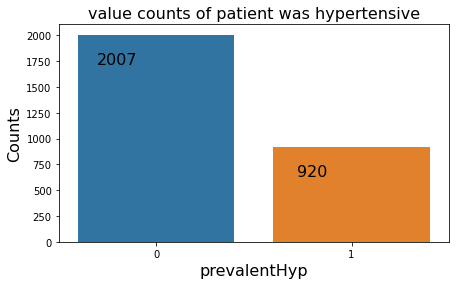

In [ ]:
# value counts of patient was hypertensive
plt.figure(figsize=(7,4))
ch = sns.countplot(data['prevalentHyp'])
plt.xlabel('prevalentHyp', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of patient was hypertensive', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**value counts of patient had diabetes**

In [ ]:
#value counts of patient had diabetes
diabetes = data['diabetes'].value_counts()
diabetes

0    2848
1      79
Name: diabetes, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa61e1915d0>,
 [Text(-0.6287024474481075, -0.9026257433580984, '0'),
  Text(0.6858572903044546, 0.9846825769435708, '1')],
 [Text(-0.3429286076989677, -0.49234131455896274, '97.3%'),
  Text(0.40008341934426517, 0.5743981698837496, '2.7%')])

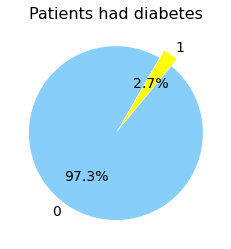

In [ ]:
plt.rcParams['figure.figsize'] = 4,4
labels = data['diabetes'].value_counts().index.tolist()
sizes = data['diabetes'].value_counts().tolist()
plt.title('Patients had diabetes', size=16)
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**Value Count of Age**

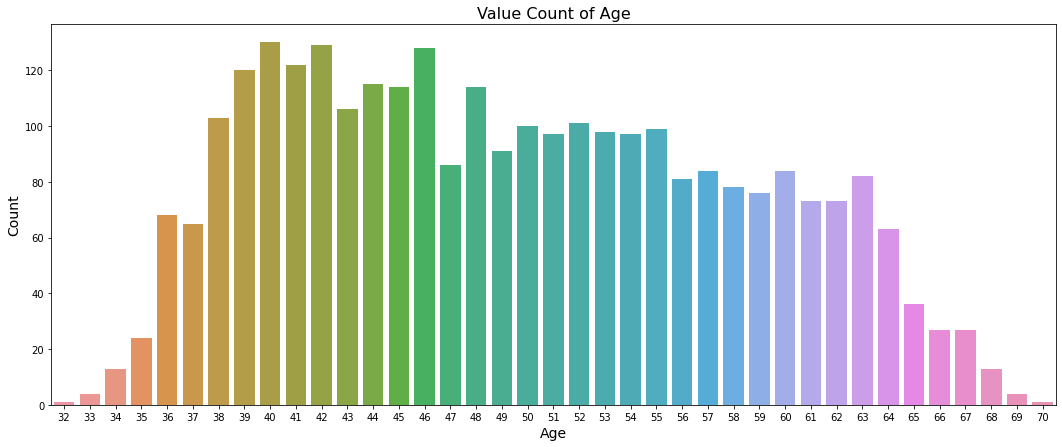

In [ ]:
#value counts of age feature
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='age')
plt.title('Value Count of Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Age Vs Person Smoking**

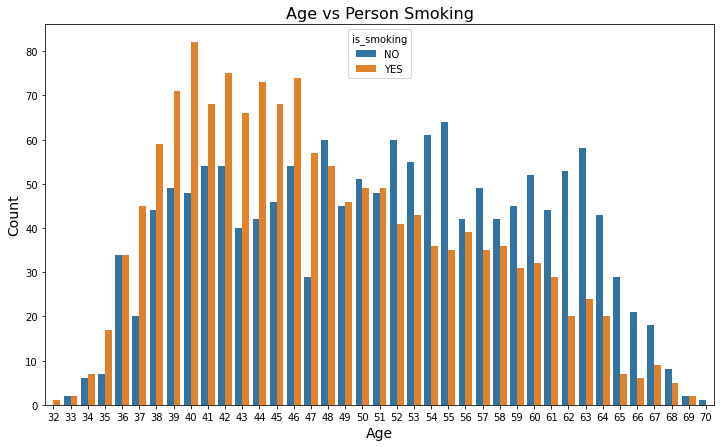

In [ ]:
#visualization of person smoking on the basis of age
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='age', hue='is_smoking')
plt.title('Age vs Person Smoking', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Male and Female Vs Person Smoking**

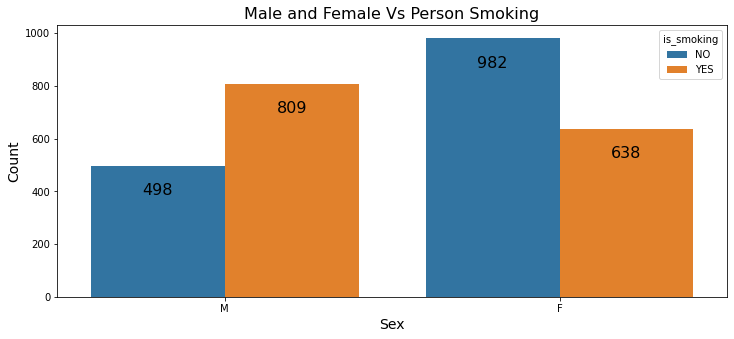

In [ ]:
#visualization of person smoking on the basis of sex
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data,x='sex',  hue='is_smoking')
plt.title('Male and Female Vs Person Smoking', size=16)
plt.xlabel('Sex', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=16)
plt.show()

# **Data Preparation**

**Checking Correlation**

In [ ]:
data.corr()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.024679,-0.029438,-0.031746,0.014426,-0.034277,0.022882,0.004331,-0.015428,0.030634,0.004233,0.033410,0.027590,0.011366,0.010901
age,0.024679,1.000000,-0.161238,-0.184110,0.138570,0.049756,0.313543,0.111085,0.281156,0.405238,0.231322,0.141001,0.013947,0.108882,0.234423
education,-0.029438,-0.161238,1.000000,0.015506,-0.023534,-0.027410,-0.082675,-0.054464,-0.011575,-0.130417,-0.056034,-0.131304,-0.061501,-0.034099,-0.062442
cigsPerDay,-0.031746,-0.184110,0.015506,1.000000,-0.036866,-0.047461,-0.080570,-0.048959,-0.026606,-0.105104,-0.067483,-0.095310,0.055770,-0.064029,0.059797
BPMeds,0.014426,0.138570,-0.023534,-0.036866,1.000000,0.114107,0.260039,0.069443,0.098210,0.280788,0.206209,0.088962,0.014681,0.069125,0.092868
prevalentStroke,-0.034277,0.049756,-0.027410,-0.047461,0.114107,1.000000,0.059703,0.013866,0.002418,0.061712,0.059594,0.029168,-0.018617,0.021427,0.052014
prevalentHyp,0.022882,0.313543,-0.082675,-0.080570,0.260039,0.059703,1.000000,0.082510,0.162100,0.699240,0.612037,0.304790,0.154375,0.086143,0.169136
diabetes,0.004331,0.111085,-0.054464,-0.048959,0.069443,0.013866,0.082510,1.000000,0.069232,0.108990,0.058115,0.090249,0.046822,0.617189,0.100006
totChol,-0.015428,0.281156,-0.011575,-0.026606,0.098210,0.002418,0.162100,0.069232,1.000000,0.210685,0.165101,0.113206,0.091487,0.066703,0.106473
sysBP,0.030634,0.405238,-0.130417,-0.105104,0.280788,0.061712,0.699240,0.108990,0.210685,1.000000,0.783586,0.340782,0.180690,0.134609,0.217419


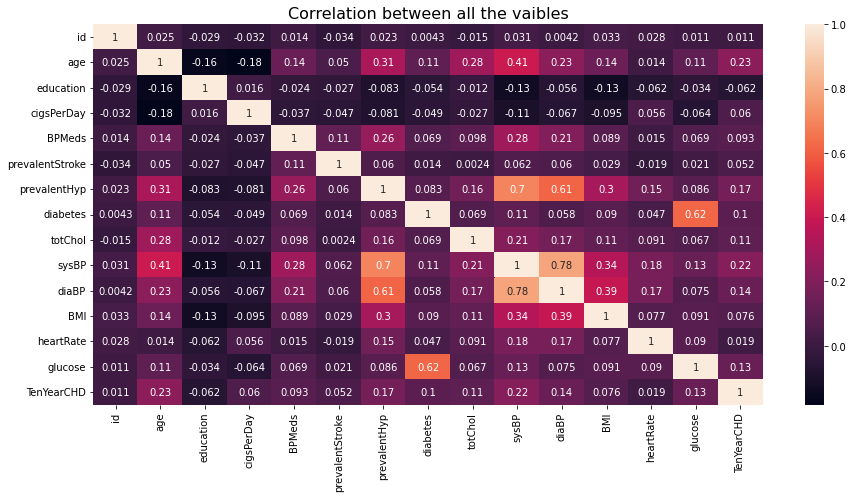

In [ ]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

# **Data Transformation**

In [ ]:
# Adding pulse pressure as a column
data['pulsePressure'] = data['sysBP'] - data['diaBP']
# Dropping the systolic and diastolic BP columns
data.drop(['sysBP','diaBP'], axis = 1, inplace = True)
# Dropping the 'is_smoking' column
data.drop('is_smoking', axis = 1, inplace = True)

In [ ]:
# Creating dummy variables for 'sex'
data = pd.get_dummies(data , columns = ['sex'])

In [ ]:
data['TenYearCHD'].value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

## **There exits a clear imbalance in the classes. Hence, we will use SMOTE to oversample the classes which are in less number.**

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Creating an instance for SMOTE
smote = SMOTE()

## **Dependent and Independent Variables**

In [ ]:
# Dividing data into independent (X) and dependent (y) variables
independent_variables = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulsePressure', 'sex_F', 'sex_M']
dependent_variable = 'TenYearCHD'
X = data.loc[:, independent_variables]
y = data[dependent_variable]

In [ ]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y has {y.shape[0]} rows')

X has 2927 rows and 14 columns
y has 2927 rows


In [ ]:
# Using SMOTE to oversample
X,y = smote.fit_resample(X,y)

In [ ]:
# Counts of each classes after oversampling
print(list(y).count(1))
print(list(y).count(0))

2483
2483


In [ ]:
# Rows in the dataset after oversampling
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')

Number of rows in X is 4966
Number of rows in y is 4966


### **The numbers in the data have different ranges, hence, we will scale the data using the Min Max Scaler**

In [ ]:
# Importing Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Creating an instance for Min Max Scaler
scaler = MinMaxScaler()

In [ ]:
# Scaling the independent variables
X = scaler.fit_transform(X)

# **Model Implementation**




**1. Decision Tree Classifier**

**2. Logistic Regression**

**3. KNeighbors Classifier**

**4. Naive Bayes Classifier**

**5. SVM Classifier**

**6. XGB Classifier**

**7. Random Forest Classifier (Tuning)**

## **Libraries required for Model**

In [ ]:
# Importing libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

**Train and Test data sets**

In [ ]:
# Importing packages to split data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
# Creating a dictionary for models
models = {'Decision Tree Classifier' : DecisionTreeClassifier(),
          'Logistic Regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Naive Bayes' : GaussianNB(),
          'SVC' : SVC(probability=True),
          'XGB Classifier' : XGBClassifier(),
          'Random Forest' : RandomForestClassifier()}

In [ ]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  
  # Creating a dataframe
  model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])
  
  # Creating necessary dictionaries
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:,1]

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df = model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc}, ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

    

  return model_df, train_confusion_matrix, test_confusion_matrix, curve

In [ ]:
# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models)

In [ ]:
# Models and their scores
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Decision Tree Classifier,1.000000,0.819920,1.000000,0.808712,1.000000,0.845545,1.000000,0.819500
1,Logistic Regression,0.753273,0.741449,0.791813,0.800971,0.684530,0.653465,0.752997,0.742888
2,KNN,0.880161,0.811871,0.867417,0.812992,0.896360,0.817822,0.880226,0.811774
3,Naive Bayes,0.646274,0.651911,0.745923,0.777003,0.439333,0.441584,0.645444,0.655352
4,SVC,0.778197,0.742455,0.826683,0.808933,0.701719,0.645545,0.777891,0.744040
5,XGB Classifier,0.879658,0.849095,0.944840,0.931873,0.805359,0.758416,0.879360,0.850578
6,Random Forest,1.000000,0.894366,1.000000,0.929185,1.000000,0.857426,1.000000,0.894971


In [ ]:
# Train confusion matrix
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Decision Tree Classifier
[[1994    0]
 [   0 1978]]
********************
Model : Logistic Regression
[[1638  356]
 [ 624 1354]]
********************
Model : KNN
[[1723  271]
 [ 205 1773]]
********************
Model : Naive Bayes
[[1698  296]
 [1109  869]]
********************
Model : SVC
[[1703  291]
 [ 590 1388]]
********************
Model : XGB Classifier
[[1901   93]
 [ 385 1593]]
********************
Model : Random Forest
[[1994    0]
 [   0 1978]]
********************


In [ ]:
# Test confusion matrix
for name, matrix in test_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Decision Tree Classifier
[[388 101]
 [ 78 427]]
********************
Model : Logistic Regression
[[407  82]
 [175 330]]
********************
Model : KNN
[[394  95]
 [ 92 413]]
********************
Model : Naive Bayes
[[425  64]
 [282 223]]
********************
Model : SVC
[[412  77]
 [179 326]]
********************
Model : XGB Classifier
[[461  28]
 [122 383]]
********************
Model : Random Forest
[[456  33]
 [ 72 433]]
********************


Text(0.5, 1.0, 'ROC CURVE')

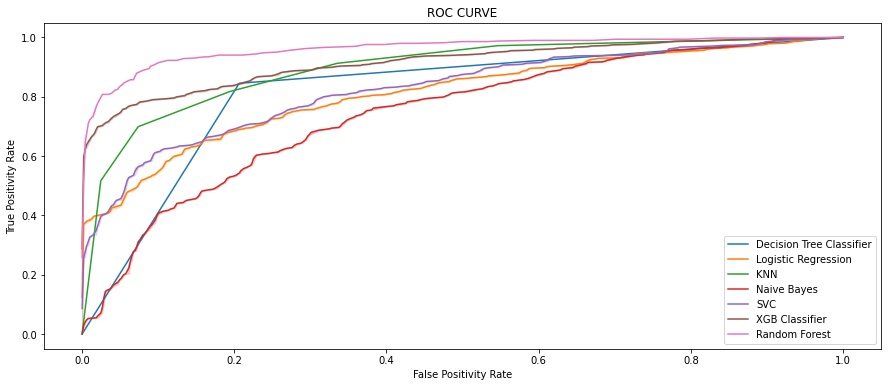

In [ ]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

# **Hyperparameter Tuning**

In [ ]:
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating a function for hyperparameter tuning
def grid_fitting(name, hyperparams, estim):
  '''Returns a dataframe with scores of the model post hyperparameter tuning along with best model and confusion matrix for train and test '''
  
  grid_df = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])

  grid = GridSearchCV(estimator= estim, param_grid = hyperparams, cv = 5 , n_jobs = -1,  verbose = 1)

  grid.fit(X_train,y_train)

  best_model = grid.best_estimator_

  train_grid = best_model.predict(X_train)
  test_grid = best_model.predict(X_test)

  grid_train_accuracy = accuracy_score(y_train, train_grid)
  grid_test_accuracy = accuracy_score(y_test, test_grid)
  grid_train_precision = precision_score(y_train, train_grid)
  grid_test_precision = precision_score(y_test, test_grid)
  grid_train_recall = recall_score(y_train, train_grid)
  grid_test_recall = recall_score(y_test, test_grid)
  grid_train_roc_auc = roc_auc_score(y_train, train_grid)
  grid_test_roc_auc = roc_auc_score(y_test, test_grid)

  grid_df = grid_df.append({'Model': name,
                           'Train Accuracy' : grid_train_accuracy,
                           'Test Accuracy': grid_test_accuracy,
                           'Train Precision' : grid_train_precision,
                           'Test Precision' : grid_test_precision,
                           'Train Recall' : grid_train_recall,
                           'Test Recall' : grid_test_recall,
                           'Train ROC AUC' : grid_train_roc_auc,
                           'Test ROC AUC' : grid_test_roc_auc},
                           ignore_index = True)
  
  grid_train_cm = confusion_matrix(y_train, train_grid)
  grid_test_cm = confusion_matrix(y_test, test_grid)


  return best_model, grid_df, grid_train_cm, grid_test_cm

In [ ]:
n_estimators= [160,210,10]
max_depth = [25,35,1]
min_samples_split = [2,5,1]
min_samples_leaf = [1,5,1]
max_features= [4,10,1]

In [ ]:
random_grid = {'n_estimators' : n_estimators,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_features' : max_features}

print(random_grid)


{'n_estimators': [160, 210, 10], 'max_depth': [25, 35, 1], 'min_samples_split': [2, 5, 1], 'min_samples_leaf': [1, 5, 1], 'max_features': [4, 10, 1]}


In [ ]:
# Apply the function to tune the parameters
rf_best_model, rf_df, rf_grid_train_cm, rf_grid_test_cm = grid_fitting('Random Forest', random_grid, RandomForestClassifier())

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [ ]:
# The best estimators of the model
rf_best_model

RandomForestClassifier(max_depth=25, max_features=4, n_estimators=160)

In [ ]:
# Dataframe showing scores of the model after hyperparameter tuning
rf_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Random Forest,1.0,0.908451,1.0,0.940426,1.0,0.875248,1.0,0.908994


In [ ]:
# Confusion matrix of training data after hyperparameter tuning
rf_grid_train_cm

array([[1994,    0],
       [   0, 1978]])

In [ ]:
# Confusion matrix of test data after hyperparameter tuning
rf_grid_test_cm

array([[461,  28],
       [ 63, 442]])

In [ ]:
!pip install shap

In [ ]:
# Importing SHAP
import shap

In [ ]:
# Creating instances of shap
explainer = shap.TreeExplainer(rf_best_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
# As X_test is an array without column names we will build a dataframe
shap_df = pd.DataFrame(X_test, columns = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'pulsePressure', 'sex_F', 'sex_M'])

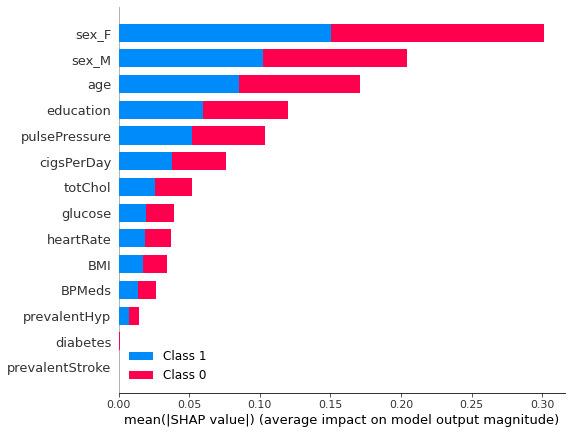

In [ ]:
# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')

## **Conclusion :**

Models accuracy of predicting the patient's risk of developing Coronary Heart Disease **(CHD)** in the next **10 years.**

As conclusion to the project, I would like to summarize the process and some details of the project.

The data was cleaned, an EDA was performed, transformation of data was done in order to ensure it fits well into machine learning models, modelling along with evaluation of the models was done and finally hyperparameter tuning was done in an attempt to imporve the model.

6 models were used in the project, namely, Decision Tree, Logistic Regression, Random Forest, XGB Classifier, KNN and SVM. Random Forest was best performing base model. Hyperparameter tuning was done on the same model.

The final results of the model are almost close to the base model and we have acheived almost 90% test accuracy and test precision, where as we have acheived almost 88% test recall.

Using SHAP we identified the feature importances and identified that, gender, age and education were 3 main influencers.

Other methods or models could be used to further improve the model. With the help of a medical expert we could engineer more features which would in turn help improve the model further.